# Demonstration of `Vs_Profile` class objects

This notebook demonstrates how to initialize objects of the `Vs_Profile` class, and the different functionalities of this class. The detailed documentation of this class is [here](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_Vs_profile.html).

_This notebook takes about 10 minutes to read through._

## 1. Import relevant libraries

In [1]:
import numpy as np

In [2]:
from PySeismoSoil.class_Vs_profile import Vs_Profile

## 2. Initialize a `Vs_Profile` object from a numpy array

### 2.1. Initialization

The valid format for describing a Vs profile is as follows. The five columns are: soil layer thickness (unit: m), shear-wave velocity (unit: m/s), damping ratio (unit: 1 or %), mass density (unit: $\mathrm{kg/m^3}$ or $\mathrm{g/cm^3}$), and "material index" (non-negative integers) that maps each soil layer to a soil material ($G/G_{\max}$ or damping curve).

In [3]:
data = np.array([
    [10, 251, 5, 1.85, 1],
    [15, 314, 4, 1.92, 2],
    [32, 429, 3, 1.95, 3],
    [52, 612, 2, 2.00, 4],
    [30, 980, 1, 2.50, 5],
])

In [4]:
vs_profile = Vs_Profile(data, damping_unit='%', density_unit='g/cm^3')

Note: `damping_unit` and `density_unit` are optional keyword arguments. Their default values are `'1'` and `'kg/m^3'`, respectively.

### 2.2. View data

You can view a tabulated Vs profile by printing the object:

In [5]:
vs_profile


----------+----------+-------------+------------------+--------------
  Thk [m] | Vs [m/s] | Damping [%] | Density [kg/m^3] | Material No. 
----------+----------+-------------+------------------+--------------
  10.00   |  251.0   |    5.000    |      1850.0      |      1       
  15.00   |  314.0   |    4.000    |      1920.0      |      2       
  32.00   |  429.0   |    3.000    |      1950.0      |      3       
  52.00   |  612.0   |    2.000    |      2000.0      |      4       
  30.00   |  980.0   |    1.000    |      2500.0      |      5       
----------+----------+-------------+------------------+--------------

(Vs30 = 302.2 m/s)

### 2.3. Retrieve data

You can retrieve the data from a `Vs_Profile` object by accessing the `vs_profile` attribute.

_Note that the units of damping and density will be converted into "1" and $\mathrm{kg/m^3}$, regardless of what unit you use as input._

In [6]:
vs_profile.vs_profile

array([[1.00e+01, 2.51e+02, 5.00e-02, 1.85e+03, 1.00e+00],
       [1.50e+01, 3.14e+02, 4.00e-02, 1.92e+03, 2.00e+00],
       [3.20e+01, 4.29e+02, 3.00e-02, 1.95e+03, 3.00e+00],
       [5.20e+01, 6.12e+02, 2.00e-02, 2.00e+03, 4.00e+00],
       [3.00e+01, 9.80e+02, 1.00e-02, 2.50e+03, 5.00e+00]])

### 2.4. Initialize with only two columns

Alternatively, you can only provide the first two column (layer thickness and shear-wave velocity), and the remaining columns will be automatically calculated.

In [7]:
data_ = data[:, :2]

In [8]:
print(vs_profile)


----------+----------+-------------+------------------+--------------
  Thk [m] | Vs [m/s] | Damping [%] | Density [kg/m^3] | Material No. 
----------+----------+-------------+------------------+--------------
  10.00   |  251.0   |    5.000    |      1850.0      |      1       
  15.00   |  314.0   |    4.000    |      1920.0      |      2       
  32.00   |  429.0   |    3.000    |      1950.0      |      3       
  52.00   |  612.0   |    2.000    |      2000.0      |      4       
  30.00   |  980.0   |    1.000    |      2500.0      |      5       
----------+----------+-------------+------------------+--------------

(Vs30 = 302.2 m/s)



In [9]:
data_

array([[ 10., 251.],
       [ 15., 314.],
       [ 32., 429.],
       [ 52., 612.],
       [ 30., 980.]])

`xi_rho_formula` specifies how damping and density are determined from Vs:

In [10]:
vs_profile_ = Vs_Profile(data_, xi_rho_formula=3)

In [11]:
vs_profile_


----------+----------+-------------+------------------+--------------
  Thk [m] | Vs [m/s] | Damping [%] | Density [kg/m^3] | Material No. 
----------+----------+-------------+------------------+--------------
  10.00   |  251.0   |    3.320    |      1800.0      |      1       
  15.00   |  314.0   |    2.654    |      1800.0      |      2       
  32.00   |  429.0   |    1.943    |      1800.0      |      3       
  52.00   |  612.0   |    1.362    |      1800.0      |      4       
  30.00   |  980.0   |    0.850    |      2000.0      |      5       
----------+----------+-------------+------------------+--------------

(Vs30 = 302.2 m/s)

### 2.5. Add a "half space" at the bottom

You can choose to add a "half space" (represented by a layer of 0 thickness) at the bottom. If your data already has a 0-thickness layer at the bottom, it will not be overridden. **Adding a half space is strongly recommended, because it makes subsequent calculations easier.**

In [12]:
vs_profile__ = Vs_Profile(data, add_halfspace=True)

In [13]:
vs_profile__  # there is an additional layer at the bottom with identical Vs, damping, and density


----------+----------+-------------+------------------+--------------
  Thk [m] | Vs [m/s] | Damping [%] | Density [kg/m^3] | Material No. 
----------+----------+-------------+------------------+--------------
  10.00   |  251.0   |    5.000    |      1850.0      |      1       
  15.00   |  314.0   |    4.000    |      1920.0      |      2       
  32.00   |  429.0   |    3.000    |      1950.0      |      3       
  52.00   |  612.0   |    2.000    |      2000.0      |      4       
  30.00   |  980.0   |    1.000    |      2500.0      |      5       
   0.00   |  980.0   |    1.000    |      2500.0      |      0       
----------+----------+-------------+------------------+--------------

(Vs30 = 302.2 m/s)

## 3. Initialize a `Vs_Profile` object from a text file

You can initialize a `Vs_Profile` object from a text file, which contains two or five columns:

In [14]:
vs_profile = Vs_Profile('../tests/files/profile_FKSH14.txt')

In [15]:
vs_profile


----------+----------+-------------+------------------+--------------
  Thk [m] | Vs [m/s] | Damping [%] | Density [kg/m^3] | Material No. 
----------+----------+-------------+------------------+--------------
   2.00   |  120.0   |    2.000    |      1466.0      |      1       
   6.00   |  190.0   |    2.000    |      1900.0      |      2       
  44.00   |  280.0   |    2.000    |      1900.0      |      3       
  54.00   |  1030.0  |    2.000    |      2125.0      |      4       
   9.00   |  1210.0  |    1.000    |      2243.0      |      5       
   0.00   |  1210.0  |    1.000    |      2243.0      |      0       
----------+----------+-------------+------------------+--------------

(Vs30 = 236.6 m/s)

## 4. View a `Vs_Profile` object

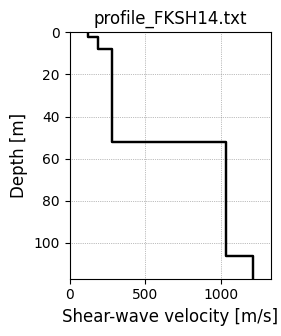

In [16]:
vs_profile.plot();

## 5. Query information from a `Vs_Profile` object

For a full list of attributes and/or methods, please see the [documentation](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_Vs_profile.html).

In [17]:
vs_profile.n_layer  # number of layers

5

In [18]:
vs_profile.vs30  # unit: m/s

236.56126482213443

In [19]:
vs_profile.z_max  # maximum depth

115.0

In [20]:
vs_profile.get_basin_depth(bedrock_Vs=1200.0)  # depth where Vs first exceeds `bedrock_Vs`

106.0

In [21]:
vs_profile.get_z1()  # depth where Vs first exceeds 1,000 m/s

52.0

## 6. Manipulating a `Vs_Profile` object

### 6.1. Transfer/amplification functions of the Vs profile

Get linear amplification functions (real-valued) of this Vs profile

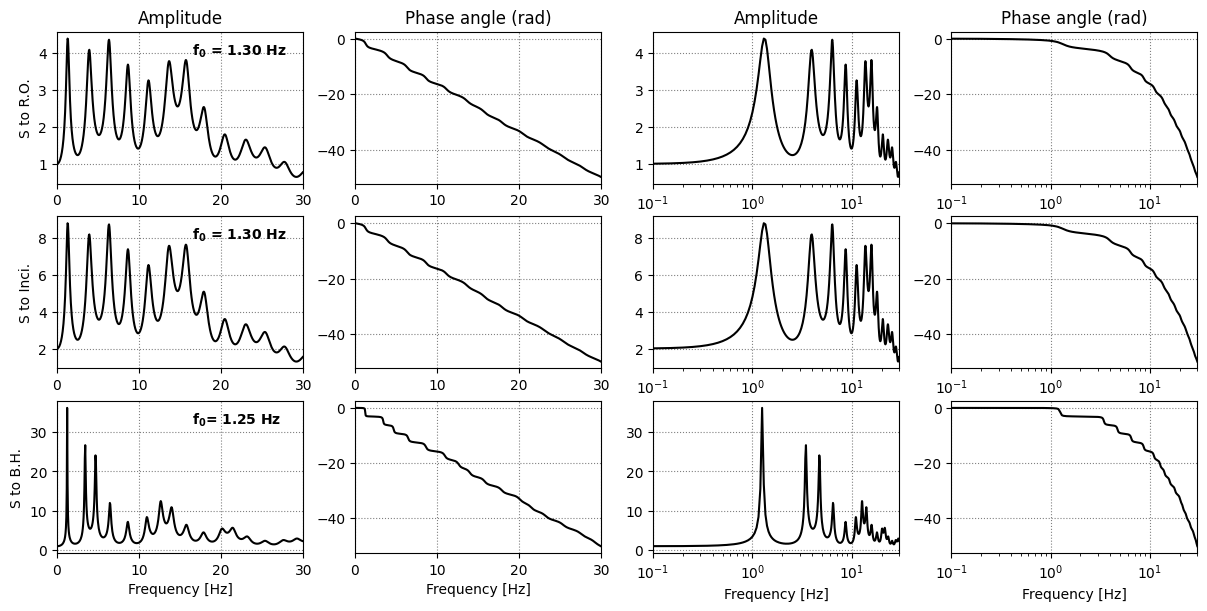

In [22]:
af_RO, af_BH, af_IN = vs_profile.get_ampl_function(show_fig=True);

The three returned variables are objects of `Amplification_Function` class, which is a child class of `Frequency_Spectrum`. For detailed documentations, see [here](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_frequency_spectrum.html). The demo of that class is [here](./Demo_03_Frequency_Spectrum.ipynb).

In [23]:
type(af_RO)

PySeismoSoil.class_frequency_spectrum.Frequency_Spectrum

Similarly, we can calculate the comples-valued linear transfer functions of this Vs profile:

In [24]:
tf_RO, tf_BH, tf_IN = vs_profile.get_transfer_function(show_fig=False)

The three returned variables are objects of `Transfer_Function` class, which is another child class of `Frequency_Spectrum`.

In [25]:
type(tf_RO)

PySeismoSoil.class_frequency_spectrum.Frequency_Spectrum

### 6.2. Fundamental frequencies of the Vs profile

In [26]:
vs_profile.get_f0_BH()  # fundamental frequency of "surface-to-borehole" amplification function

1.2500000000000002

In [27]:
vs_profile.get_f0_RO()  # fundamental frequency of "surface-to-rock-outcrop" amplification function

1.3

### 6.3. Query Vs values within the Vs profile

Query the soil layer depths (in meters) of each layer:

In [28]:
vs_profile.get_depth_array()

array([  0.,   2.,   8.,  52., 106., 115.])

Query Vs at specified depths:

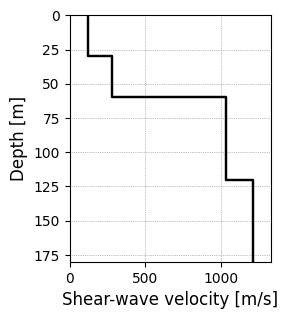

In [29]:
queried = vs_profile.query_Vs_at_depth(
    np.array([0, 30, 60, 90, 120, 150]), as_profile=True
)
queried.plot();

Query Vs at a fixed thickness interval:

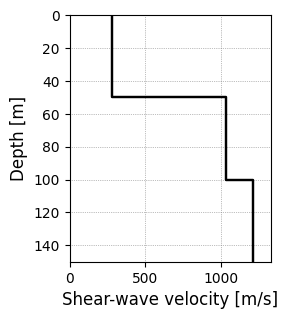

In [30]:
queried = vs_profile.query_Vs_given_thk(25, as_profile=True)
queried.plot();

Query Vs according to a given array of layer thickness:

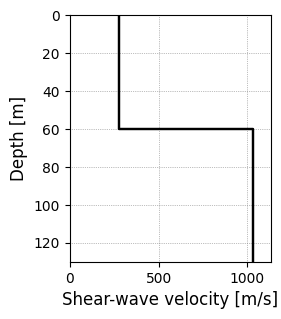

In [31]:
queried = vs_profile.query_Vs_given_thk(
    np.array([20, 20, 20, 25, 25]), as_profile=True
)
queried.plot();

### 6.4. Truncate Vs profile and "glue" a half space at the bottom

In [32]:
truncated_profile = vs_profile.truncate(depth=20, Vs=1500)


----------+----------+-------------+------------------+--------------
  Thk [m] | Vs [m/s] | Damping [%] | Density [kg/m^3] | Material No. 
----------+----------+-------------+------------------+--------------
   2.00   |  120.0   |    2.000    |      1466.0      |      1       
   6.00   |  190.0   |    2.000    |      1900.0      |      2       
  12.00   |  280.0   |    2.000    |      1900.0      |      3       
   0.00   |  1500.0  |    0.238    |      2000.0      |      0       
----------+----------+-------------+------------------+--------------

(Vs30 = 306.8 m/s)



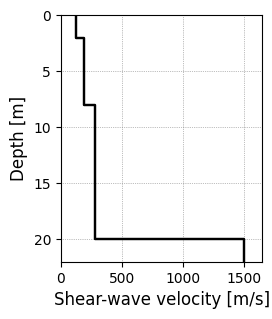

In [33]:
truncated_profile.summary()